<a href="https://colab.research.google.com/github/glennsby/Glennsby/blob/main/TugasPython11Glenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [57]:
ls

3scene/                         IMG_20200917_135936.jpg  Tugas11Python.ipynb
best_weight_scene_mobileNet.h5  nnmodel_scene/           TugasPython11.ipynb
highway_a866047.jpg             Python/                  Tugaspython.ipynb


In [58]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [59]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Python")
data = []
labels = []

[INFO] loading images...


In [60]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((165, 165))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [61]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [62]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [63]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [64]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(436, 165, 165, 3)
(146, 165, 165, 3)


In [65]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(165,165,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 161, 161, 16)      1216      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 78, 78, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)       

In [66]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [67]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

Epoch 1/20
14/14 [==============================] - 10s 687ms/step - loss: 1.6121 - accuracy: 0.2018 - val_loss: 1.5916 - val_accuracy: 0.2329
Epoch 2/20
14/14 [==============================] - 10s 679ms/step - loss: 1.5557 - accuracy: 0.3417 - val_loss: 1.4340 - val_accuracy: 0.4658
Epoch 3/20
14/14 [==============================] - 10s 680ms/step - loss: 1.3903 - accuracy: 0.4243 - val_loss: 1.2865 - val_accuracy: 0.5000
Epoch 4/20
14/14 [==============================] - 10s 689ms/step - loss: 1.1692 - accuracy: 0.5459 - val_loss: 1.1356 - val_accuracy: 0.5274
Epoch 5/20
14/14 [==============================] - 10s 689ms/step - loss: 1.0015 - accuracy: 0.6078 - val_loss: 1.1991 - val_accuracy: 0.5616
Epoch 6/20
14/14 [==============================] - 10s 688ms/step - loss: 0.9004 - accuracy: 0.6766 - val_loss: 0.8469 - val_accuracy: 0.6781
Epoch 7/20
14/14 [==============================] - 10s 689ms/step - loss: 0.7477 - accuracy: 0.7087 - val_loss: 0.7180 - val_accuracy: 0.6918

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


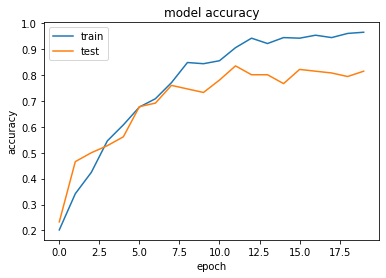

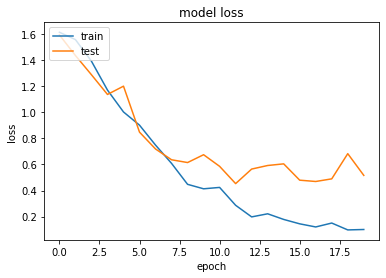

In [68]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.62      0.93      0.74        28
      GMB_02       0.86      0.69      0.77        26
      GMB_03       0.96      0.81      0.88        27
      GMB_04       0.84      0.82      0.83        38
      GMB_05       0.96      0.81      0.88        27

    accuracy                           0.82       146
   macro avg       0.85      0.81      0.82       146
weighted avg       0.84      0.82      0.82       146



In [70]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [71]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200917_135936.jpg'

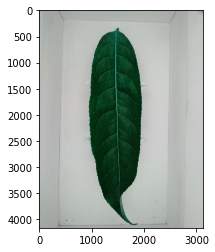

In [72]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [73]:
image_testing = Image.open('IMG_20200917_135936.jpg')
image_testing = np.array(image_testing.resize((165, 165))) / 255.0
image_testing.shape

(165, 165, 3)

In [74]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 165, 165, 3)


In [75]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.21076926e-04 4.35147844e-02 9.56359863e-01 4.26898941e-06
  7.44007522e-08]]
['GMB_03']
